In [1]:
from netCDF4 import Dataset

from mppi import InputFiles as I, Calculators as C, Datasets as D, Utilities as U, Parsers as P
import matplotlib.pyplot as plt
import numpy as np

Analysis of the JDos including the spin dipoles. 

We use the results of 50 kpoints close to $\Gamma$.

In [2]:
data = P.PwParser('NSCF/bnds_16-kpoints_50-sampling_random_close_Gamma.save/data-file-schema.xml')

Parse file : NSCF/bnds_16-kpoints_50-sampling_random_close_Gamma.save/data-file-schema.xml


In [3]:
def get_spin_dipoles(file):
    from netCDF4 import Dataset as Ds
    import numpy as np
    db = Ds(file)
    spin = np.array(db.variables['DIP_spin'][0])
    return spin

def get_spin_weight(spin,kpoint,band1,band2,component):
    value = spin[kpoint][band1][band2][component]
    return value[0]**2+value[1]**2

In [4]:
spin = get_spin_dipoles('RT_k50/FixSymm/dephase_0.002-freq_1.5-int_1000.0-simTime_10000/ndb.dipoles')

We build the cc' transitions (in meV)

In [5]:
transitions = 1e3*data.get_transitions(set_gap=1.42,initial=[8,9],final=[8,9])

Apply a scissor of 0.5456147497318283 eV


In [8]:
weights = data.weights

We substitute the weigths with the values of the dipoles matrix elements

In [64]:
weights_spin = []
norm = 0.
for k in range(len(transitions)):
    value = get_spin_weight(spin,k,4,5,2)
    weights_spin.append([value])
    norm+=value
print(norm)
weights_spin = np.array(weights_spin)/norm

37.664034048129025


In [65]:
weights_spin[0]

array([0.02190377])

In [66]:
dos = U.Dos()
dos.append_fromPwData(transitions,weights_spin,minVal=-2,maxVal=4,eta=0.01,label='spin')
dos.append_fromPwData(transitions,weights,minVal=-2,maxVal=4,eta=0.01,label='original')

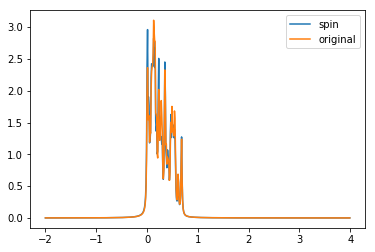

In [67]:
dos.plot(plt)
plt.legend()

In [26]:
for k in range(50):
    print(k,get_spin_weight(spin,k,4,5,2))

0 0.8249843737385644
1 0.829829394822116
2 0.9945823594358749
3 0.9982242037606943
4 0.9843228806019876
5 0.32574932841435883
6 0.9831181188631667
7 0.28185171791338604
8 0.4383215618151055
9 0.9528665073240621
10 0.4664649769421026
11 0.9973963412927128
12 0.768886028214664
13 0.7611999357876915
14 0.8104570776633915
15 0.9708042680373675
16 0.9243076426073948
17 0.9966559535789306
18 0.8170618087389324
19 0.9619514800736384
20 0.7973016503119503
21 0.9995826330176425
22 0.8737579499214142
23 0.8376061414193077
24 0.998913293068361
25 0.9116591618799763
26 0.9975051166524032
27 0.6737624543349339
28 0.9915884301426892
29 0.4952859798164144
30 0.15472669885623508
31 0.741590159429057
32 0.864460666088015
33 0.9862076778928117
34 0.9654665237944486
35 0.4573945691871646
36 0.9834300145424669
37 0.41977823846972323
38 0.9962943387386181
39 0.47769169810317874
40 0.736424082749148
41 0.5267899906141718
42 0.8557683914036749
43 0.24910168570565283
44 0.8577266990590724
45 0.464676726458812

In [27]:
for k in range(50,100):
    print(k,get_spin_weight(spin,k,4,5,2))

50 0.9945823594358748
51 0.9945823594358745
52 0.9945823594358751
53 0.5967348527589483
54 0.5967348527589478
55 0.5967348527589481
56 0.596734852758948
57 0.4013389910305044
58 0.4013389910305044
59 0.4013389910305044
60 0.40133899103050447
61 0.9945823594358748
62 0.9945823594358751
63 0.9945823594358751
64 0.9945823594358749
65 0.5967348119082213
66 0.5967348119082211
67 0.5967348119082214
68 0.5967348119082214
69 0.4013389635560082
70 0.4013389635560082
71 0.4013389635560082
72 0.4013389635560081
73 0.9945823594358747
74 0.9945823594358746
75 0.9945823594358745
76 0.9945823594358751
77 0.5967348527589483
78 0.5967348527589478
79 0.5967348527589482
80 0.596734852758948
81 0.4013389910305044
82 0.4013389910305044
83 0.40133899103050436
84 0.4013389910305044
85 0.9945823594358748
86 0.9945823594358754
87 0.9945823594358749
88 0.9945823594358749
89 0.5967348119082213
90 0.5967348119082211
91 0.5967348119082213
92 0.5967348119082214
93 0.4013389635560082
94 0.4013389635560081
95 0.40133

In [ ]:
#######################################################################################

In [2]:
file = 'RT_k50/FixSymm/dephase_0.002-freq_1.5-int_1000.0-simTime_10000/ndb.dipoles'

In [3]:
database = Dataset(file)

In [4]:
database

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): D_0000000003(3), D_0000000001(1), D_0000000002(2), D_0000000004(4), D_0000000011(11), D_0000000100(100), D_0000000006(6), D_0000002317(2317)
    variables(dimensions): float64 HEAD_VERSION(D_0000000003), float64 HEAD_REVISION(D_0000000001), float64 SERIAL_NUMBER(D_0000000001), float64 SPIN_VARS(D_0000000002), float64 HEAD_R_LATT(D_0000000004), float64 HEAD_WF(D_0000000001), float64 FRAGMENTED(D_0000000001), float64 TEMPERATURES(D_0000000002), float64 PARS(D_0000000011), |S1 APPROACH(D_0000000001,D_0000000100), |S1 KINDS(D_0000000001,D_0000000100), |S1 WAVE_FUNC_XC(D_0000000001,D_0000000100), float64 DIP_iR(D_0000000001,D_0000002317,D_0000000006,D_0000000006,D_0000000003,D_0000000002), float64 DIP_P(D_0000000001,D_0000002317,D_0000000006,D_0000000006,D_0000000003,D_0000000002), float64 DIP_v(D_0000000001,D_0000002317,D_0000000006,D_0000000006,D_0000000003,D_0000000002), float64 D

In [26]:
spin = np.array(database.variables['DIP_spin'][0])

In [28]:
len(spin)

2317

First index runs over the kpoints

In [29]:
spin0 = spin[0]

In [39]:
spin0[4][4]

array([[-0.90824229,  0.        ],
       [-0.00896178,  0.        ],
       [ 0.41834869,  0.        ]])

Second and third indeces label the bands. Then the fourth gives the cartesian component of the spin operator (real and imaginary part)

In [50]:
np.sqrt(1-0.41834**2)

0.9082905066111834

In [35]:
spin0[1][0][2] 

array([0.32904217, 0.51040803])

In [42]:
def get_spin_dipoles(file):
    from netCDF4 import Dataset as Ds
    import numpy as np
    db = Ds(file)
    spin = np.array(db.variables['DIP_spin'][0])
    return spin

def get_spin_weight(spin,kpoint,band1,band2,component):
    value = spin[kpoint][band1][band2][component]
    return value[0]**2+value[1]**2
    

In [43]:
spin = get_spin_dipoles(file)

In [48]:
get_spin_weight(spin,0,5,5,2)

0.17501562442545757

In [9]:
dipole = database.variables['DIP_iR']

In [10]:
dipole

<class 'netCDF4._netCDF4.Variable'>
float64 DIP_iR(D_0000000001, D_0000002317, D_0000000006, D_0000000006, D_0000000003, D_0000000002)
unlimited dimensions: 
current shape = (1, 2317, 6, 6, 3, 2)
filling on, default _FillValue of 9.969209968386869e+36 used

In [11]:
dipole.get_dims()

(<class 'netCDF4._netCDF4.Dimension'>: name = 'D_0000000001', size = 1,
 <class 'netCDF4._netCDF4.Dimension'>: name = 'D_0000002317', size = 2317,
 <class 'netCDF4._netCDF4.Dimension'>: name = 'D_0000000006', size = 6,
 <class 'netCDF4._netCDF4.Dimension'>: name = 'D_0000000006', size = 6,
 <class 'netCDF4._netCDF4.Dimension'>: name = 'D_0000000003', size = 3,
 <class 'netCDF4._netCDF4.Dimension'>: name = 'D_0000000002', size = 2)

In [21]:
len(spin[0])

2317

In [18]:
lenspin[0][0][:][0]

masked_array(
  data=[[[-3.91236287e-02,  0.00000000e+00],
         [ 1.68119540e-01,  0.00000000e+00],
         [-1.12339436e-01,  0.00000000e+00]],

        [[ 5.08714499e-02, -1.81420595e-02],
         [-1.00663449e-01,  1.47588337e-01],
         [ 3.29042165e-01, -5.10408031e-01]],

        [[ 5.43022930e-01,  3.97778898e-01],
         [-3.67185945e-01,  1.83465705e-02],
         [-1.34402208e-01,  1.09264423e-01]],

        [[-1.82092737e-01, -2.09934544e-01],
         [ 2.38428517e-02,  7.09869843e-01],
         [-6.31110797e-02,  1.29113903e-01]],

        [[ 4.69151450e-09,  1.18658471e-08],
         [ 1.01686105e-09,  2.95734571e-09],
         [-3.90542309e-08,  2.90878725e-08]],

        [[-5.56002516e-08, -6.61255973e-08],
         [-3.46689768e-08, -6.79876339e-08],
         [ 7.68076240e-10,  1.85526928e-08]]],
  mask=False,
  fill_value=1e+20)